<a href="https://colab.research.google.com/github/gregh13/Supervised-vs-Unsupervised-Learning-ML-TensorFlow/blob/main/Supervised_vs_Unsupervised_Leaning_in_API_Security_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
import scipy.stats as stats



In [365]:
df_raw = pd.read_csv("supervised_dataset.csv")

In [366]:
df_raw.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [367]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1699 non-null   int64  
 1   _id                             1699 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1699 non-null   float64
 5   vsession_duration(min)          1699 non-null   int64  
 6   ip_type                         1699 non-null   object 
 7   num_sessions                    1699 non-null   float64
 8   num_users                       1699 non-null   float64
 9   num_unique_apis                 1699 non-null   float64
 10  source                          1699 non-null   object 
 11  classification                  1699 non-null   object 
dtypes: float64(6), int64(2), object(4)

In [368]:
df_raw.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1699.00000,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,849.00000,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,490.60337,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.00000,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,424.50000,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,849.00000,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,1273.50000,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,1698.00000,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [369]:
df_raw.duplicated().values.any()

False

In [370]:
df_raw.isna().values.any()

True

In [371]:
nan_rows = df_raw[df_raw.isna().values == True]
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier


In [372]:
df_clean = df_raw.drop(nan_rows.index)
df_clean.shape

(1695, 12)

In [373]:
df = df_clean.drop(['Unnamed: 0', '_id', "source"], axis=1)

In [374]:
quant_class = [(0 if row == "normal" else 1) for row in df["classification"]]
y = np.array(quant_class)
y[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [375]:
np.count_nonzero(y == 1)

589

In [376]:
np.count_nonzero(y == 0)

1106

In [377]:
quant_ip_type = [(0 if row == "default" else 1) for row in df["ip_type"]]
df["quant_ip_type"] = quant_ip_type
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,classification,quant_ip_type
593,0.017168,0.009708,82.773810,14325,default,171.0,168.0,135.0,normal,0
634,0.000859,0.032701,6.950000,79,default,255.0,220.0,50.0,normal,0
679,0.000011,0.033831,14.875817,2,default,1454.0,153.0,77.0,normal,0
1477,2.093636,0.242424,66.000000,8291,default,4.0,1.0,16.0,outlier,0
2,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,normal,0
1353,0.207000,0.476190,21.000000,261,default,3.0,1.0,10.0,outlier,0
913,0.038678,0.018079,36.333333,8601,default,111.0,102.0,67.0,normal,0
472,0.000144,0.001887,18.270936,128,default,1115.0,812.0,28.0,normal,0
1343,0.005882,0.051926,597.000000,211,default,38.0,1.0,31.0,outlier,0
476,0.000886,0.022278,10.710456,213,default,520.0,373.0,89.0,normal,0


In [378]:
df = df.drop(["classification", "ip_type"], axis=1)
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,quant_ip_type
998,0.001077,0.011356,13.017391,97,115.0,115.0,17.0,0
652,0.000284,0.006528,15.925743,220,908.0,808.0,84.0,0
673,0.000491,0.012208,12.000000,167,493.0,471.0,69.0,0
1292,29.826886,0.038360,756.000000,1352948,6.0,1.0,29.0,0
304,0.013716,0.014983,68.647619,5932,106.0,105.0,108.0,0
1379,0.002250,1.000000,12.000000,2,8.0,1.0,12.0,0
1488,0.011722,0.666667,9.000000,7,4.0,1.0,6.0,0
228,0.008044,0.018035,103.572327,7948,188.0,159.0,297.0,0
1622,0.158841,0.222222,63.000000,601,3.0,1.0,14.0,1
18,0.001615,0.040625,8.465608,156,211.0,189.0,65.0,0


In [379]:
X_raw = df.to_numpy()
X_raw[1]

array([6.32464613e-05, 2.21146594e-03, 1.61668048e+01, 5.19000000e+02,
       9.29900000e+03, 8.44700000e+03, 3.02000000e+02, 0.00000000e+00])

Now ready to start!

In [380]:
# Easy Way: 
X_easy = stats.zscore(X_raw, axis=0)
print(f"Easy: {X_easy[1,:]}")

# Manual Way:
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X = (X_raw - X_mean) / X_std
print(f"Manual: {X[1,:]}")

# Just for some coding fun
# 'Reinventing the Wheel'/'Sloth Slow' Way:
columns = X_raw.shape[1]
rows = X_raw.shape[0]
X_slow = np.zeros([rows,columns])
mean = np.zeros(columns)
std = np.zeros(columns)
for col in range(columns):
  for i in range(rows):
    mean[col] += X_raw[i,col]
for col in range(columns):
  mean[col] = mean[col] / rows
for col in range(columns):
  for i in range(rows):
    std[col] += ((X_raw[i,col] - mean[col])**2) / rows
std = np.sqrt(std)
for col in range(columns):
  for i in range(rows):
    X_slow[i,col] = (X_raw[i,col] - mean[col]) / std[col]

print(f"Stone Age: {X_slow[1,:]}")


  



Easy: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Manual: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Stone Age: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]


In [437]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (1017, 8) y_train.shape (1017,)
X_test.shape (678, 8) y_test.shape (678,)


In [438]:
model = Sequential(
    [
      Dense(units=16, activation="relu"),
      Dense(units=8, activation="relu"),
      Dense(units=1, activation="sigmoid", name="L3")
    ], name="NN"
)
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(0.01)
)

In [439]:
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.3631
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 8.2679e-04
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.7197e-04
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1284e-04
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4775e-04
Epoch 13/100
32/32 [=

In [417]:
model.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 16)                144       
                                                                 
 dense_70 (Dense)            (None, 8)                 136       
                                                                 
 L3 (Dense)                  (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [418]:
def calc_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    correct = 0
    for i in range(m):
        print(f"Before: {yhat[i]}, {y[i]}")
        if yhat[i] < 0.5:
          yhat[i] = 0
        else:
          yhat[i] = 1
        print(f"After: {yhat[i]}, {y[i]}")  
        if yhat[i] != y[i]:
            incorrect += 1
        else:
            correct += 1
    print(f"\n\n\nNumber of incorrect predictions: {incorrect}")
    print(f"Correct predictions: {correct} out of {m}\n")
    cerr = incorrect / m
    return(cerr)

In [440]:
training_classification_error = calc_cat_err(y_train, model.predict(X_train))
test_classification_error = calc_cat_err(y_test, model.predict(X_test))
print(f"categorization error, training,    NN model: {training_classification_error:0.5f}")
print(f"categorization error, test,        NN model: {test_classification_error:0.5f}")

Before: [7.049158e-10], 0
After: [0.], 0
Before: [2.2855954e-06], 0
After: [0.], 0
Before: [2.037643e-06], 0
After: [0.], 0
Before: [3.0319107e-09], 0
After: [0.], 0
Before: [3.0909478e-10], 0
After: [0.], 0
Before: [7.124129e-08], 0
After: [0.], 0
Before: [4.9318345e-07], 0
After: [0.], 0
Before: [4.3084376e-07], 0
After: [0.], 0
Before: [1.1480805e-05], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [2.579876e-06], 0
After: [0.], 0
Before: [2.4084636e-06], 0
After: [0.], 0
Before: [9.472175e-06], 0
After: [0.], 0
Before: [2.2173452e-07], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [1.7760929e-06], 0
After: [0.], 0
Before: [1.1416457e-08], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [2.0232712e-06], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [3.23348e-08], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [7.482

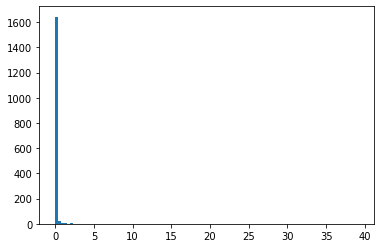

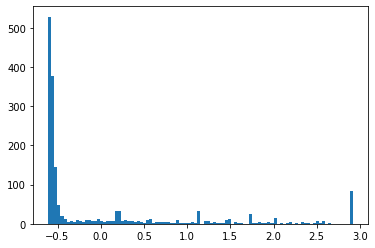

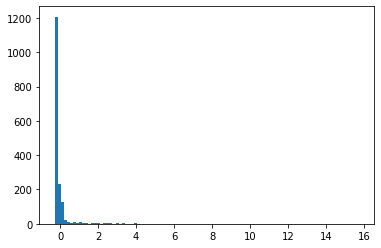

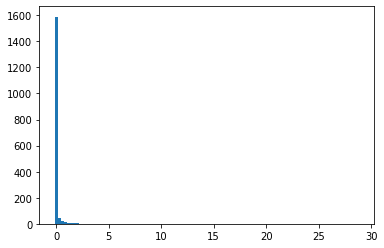

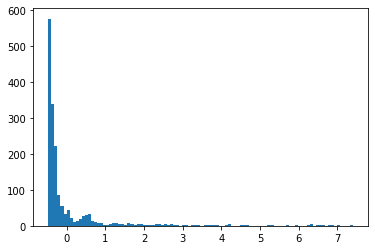

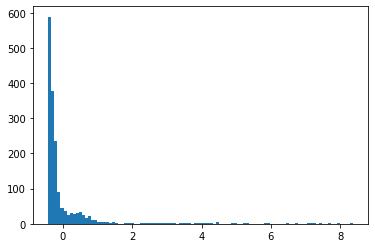

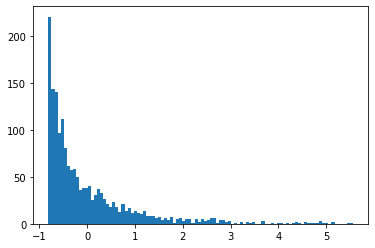

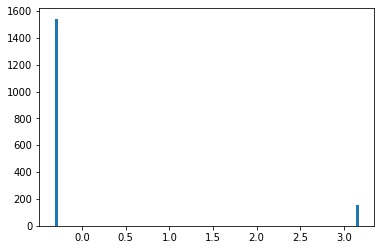

In [420]:
for i in range(X.shape[1]):
  plt.hist(X[:,i], bins=100)
  plt.show()


Now Try k-means unsupervised learning

In [471]:
# Calculates mean and variance of all features in the dataset
def estimate_gaussian(X): 
    m, n = X.shape
    mu = np.zeros(n)
    var = np. zeros(n)
    # Loops through every item in dataset
    for i in range(m):
        # Loops through each feature in a specific item
        for j in range(n):
            mu[j] += (X[i][j] / m)
    
    for i in range(m):
        for j in range(n):
            var[j] += ((X[i][j] - mu[j])**2) / m
        
    return mu, var

In [472]:
# Returns the density of the multivariate normal at each data point of X_train
def calc_multivariate_gaussian(X, mu, var):
    mvn = tfp.distributions.MultivariateNormalDiag(
        loc=mu,
        scale_diag=var)
    p = mvn.prob(X).numpy()
    
    return p

In [612]:
# Finds the best threshold to use for selecting outliers based on the results 
# from a validation set (p_val) and the ground truth (y_val)
def select_threshold(y_val, p_val): 
    counter = 0
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    true_pos = 0
    false_pos = 0
    false_neg = 0
    m = p_val.shape[0]
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        p_decision = np.zeros(m)
        tp = 0
        fp = 0
        fn = 0
        
        for i in range(m):
            # Turns probability values into decision based on epsilon value
            if p_val[i] < epsilon:
                p_decision[i] = 1
                
            # Checks the predicted decision against the ground truth    
            if p_decision[i] and y_val[i] == 1:
                tp += 1
            else:
                # Checks for false positive (predict 1, actual is 0)
                if p_decision[i] > y_val[i]:
                    fp += 1
                # Checks for false negative (predict 0, actual is 1)
                elif p_decision[i] < y_val[i]:
                    fn += 1
        if tp != 0:
            prec = tp / (tp + fp)
            rec = tp / (tp + fn)
            F1 = (2*prec*rec) / (prec + rec)
        else:
            F1 = 0

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            true_pos = tp
            false_pos = fp
            false_neg = fn
        
    return best_epsilon, best_F1, true_pos, false_pos, false_neg

In [605]:
X_train_1, X_, y_train_1, y_ = train_test_split(X,y,test_size=0.5, random_state=1)
X_val, X_test1, y_val, y_test1 = train_test_split(X_,y_,test_size=0.5, random_state=1)
print("X_train_1.shape", X_train_1.shape)
print("X_val.shape", X_val.shape, "y_val.shape", y_val.shape)
print("X_test1.shape", X_test1.shape, "y_test1.shape", y_test1.shape)

X_train_1.shape (847, 8)
X_val.shape (424, 8) y_val.shape (424,)
X_test1.shape (424, 8) y_test1.shape (424,)


In [606]:
# Estimate the Gaussian parameters
mu, var = estimate_gaussian(X_train_1)    

# Evaluate the probabilites for the validation set
p_val = calc_multivariate_gaussian(X_val, mu, var)

# Evaluate the probabilites for the test set
p_test = calc_multivariate_gaussian(X_test1, mu, var)

In [607]:

# Find the best threshold
epsilon, F1, tp, fp, fn = select_threshold(y_val, p_val)
anomalies = sum(p_test < epsilon)
print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% F1)
print('Number of Anomalies Found: %d'% anomalies)
actual_anomalies = np.count_nonzero(y_test1 == 1)
print(f"Actual Number of Anomalies: {actual_anomalies}")

Best epsilon found using cross-validation: 6.012411e-04
Best F1 on Cross Validation Set:  0.713415
Number of Anomalies Found: 167


In [584]:
print(f"True positives = {tp}")
print(f"False positives = {fp}")
print(f"False negatives = {fn}")

Let's try training it on a much larger dataset

In [503]:
df_large_raw = pd.read_csv("remaining_behavior_ext.csv")

In [504]:
df_large_raw.head(5)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,0,024aae60-1a81-3f37-bbe6-3f832c919706,7.010387,0.419355,31.0,13040,default,outlier,outlier,1.0,1.0,13.0,E
1,1,028d67dd-c6d0-329f-a20e-78db9eab7a55,51.419393,0.252336,107.0,330113,default,outlier,outlier,1.0,1.0,27.0,E
2,2,02d12bf9-5fe2-3d0c-b233-30e02224b686,25.860775,0.275000,40.0,62066,default,outlier,outlier,1.0,1.0,11.0,E
3,3,0b3aee1e-dc3b-3728-bc55-f57a23446b3d,0.205909,0.818182,11.0,136,default,outlier,outlier,1.0,1.0,9.0,E
4,4,0dbfffb4-3ed4-3cb2-904d-c348501a996e,0.122125,0.812500,16.0,118,default,outlier,outlier,1.0,1.0,13.0,E


In [505]:
df_large_raw.duplicated().values.any()

False

In [506]:
df_large_raw.isna().values.any()

True

In [508]:
nan_rows = df_large_raw[df_large_raw.isna().values == True]

In [509]:
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
10642,10642,129e3eea-880a-3a7c-8931-b133d1a06397,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
10642,10642,129e3eea-880a-3a7c-8931-b133d1a06397,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E


In [519]:
df_lg_clean = df_large_raw.drop(nan_rows.index)
df_lg_clean.shape

(34422, 13)

In [520]:
quant_ip_type_lg = [(0 if row == "default" else 1) for row in df_lg_clean["ip_type"]]
df_lg_clean["quant_ip_type"] = quant_ip_type_lg

In [521]:
df_lg = df_lg_clean
df_lg = df_lg.drop(["Unnamed: 0", "_id", "behavior", "behavior_type", "ip_type", "source"], axis=1)

In [522]:
X_raw_lg = df_lg.to_numpy()
X_raw_lg[1]

array([5.14193925e+01, 2.52336449e-01, 1.07000000e+02, 3.30113000e+05,
       1.00000000e+00, 1.00000000e+00, 2.70000000e+01, 0.00000000e+00])

In [523]:
X_lg = stats.zscore(X_raw_lg, axis=0)

Ready to test 

In [609]:
# Estimate the Gaussian parameters for large dataset
mu_lg, var_lg = estimate_gaussian(X_lg)    

# Evaluate the probabilites for the training set
p_test_lg = calc_multivariate_gaussian(X_test1, mu_lg, var_lg)

# Evaluate the probabilites for the validation set
p_val_lg = calc_multivariate_gaussian(X_val, mu_lg, var_lg)


# Find the best threshold
epsilon_lg, F1_lg, tp_lg, fp_lg, fn_lg  = select_threshold(y_val, p_val_lg)
anomalies_lg = sum(p_test_lg < epsilon_lg)
print('Best epsilon found using cross-validation: %e'% epsilon_lg)
print('Best F1 on Cross Validation Set:  %f'% F1_lg)
print('Number of Anomalies Found: %d'% anomalies_lg)
actual_anomalies_lg = np.count_nonzero(y_test1 == 1)
print(f"Actual Number of Anomalies: {actual_anomalies_lg}")

Best epsilon found using cross-validation: 2.361225e-04
Best F1 on Cross Validation Set:  0.709091
Number of Anomalies Found: 169


In [ ]:
print(f"True positives = {tp_lg}")
print(f"False positives = {fp_lg}")
print(f"False negatives = {fn_lg}")

In [611]:
print("Smaller Training Dataset")
print(f"Anomalies Detected: {anomalies}")
print(f"F1 Score: {F1}")
print("\n")
print("Larger Training Dataset")
print(f"Anomalies Detected: {anomalies_lg}")
print(f"F1 Score: {F1_lg}")

Smaller Training Dataset
Anomalies Detected: 167
F1 Score: 0.7134146341463414


Larger Training Dataset
Anomalies Detected: 169
F1 Score: 0.7090909090909091
